In [1]:
import pandas as pd

In [2]:
dft = pd.read_csv("scaled_features_tuscany.csv")
dfp = pd.read_csv("scaled_features_piemonte.csv")

In [3]:
frames = [dft,dfp]
df = pd.concat(frames)

In [4]:
df = df.fillna(0)

In [ ]:
df.columns

Index(['Wine', 'link', 'image_link', 'image_names', 'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'quality', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'price', 'rating',
       'grade_avg', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_P

In [5]:
cols = ['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_Poppins-Regular',
       'font_2_Rakkas-Regular', 'font_2_RobotoMono-Regular',
       'font_2_RobotoSlab-Regular', 'font_2_Rubik-Regular',
       'font_2_SpaceMono-Regular', 'font_2_Tahoma Bold',
       'font_2_Times New Roman', 'font_2_Times New Roman Italic',
       'font_2_Verdana Italic', 'num_review', 'wine_type_Dessert',
       'wine_type_Red', 'wine_type_Rose', 'wine_type_Sparkling',
       'wine_type_White', 'year', 'followers', 'following', 'user_ratings',
       'font_1_ArchitectsDaughter-Regular', 'font_1_PlayfairDisplay-Regular',
       'font_2_ArchitectsDaughter-Regular', 'font_2_Pacifico-Regular']

In [ ]:
len(cols)

59

In [6]:
X = df[df["quality"] == 1][cols]
X.head(2)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,...,wine_type_Sparkling,wine_type_White,year,followers,following,user_ratings,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular
0,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,-0.180086,1.062009,-0.292457,0.214080,...,0,0,0.670886,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,-0.180082,-0.688356,-0.770617,0.806691,...,0,0,0.822785,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y20 = df[df["quality"] == 1].rating2020
y21 = df[df["quality"] == 1].rating2021
y22 = df[df["quality"] == 1].rating2022
y23 = df[df["quality"] == 1].rating2023
y24 = df[df["quality"] == 1].rating2024


In [8]:
import statsmodels.api as sm

#fit linear regression model
model20 = sm.OLS(y20, X).fit()
model21 = sm.OLS(y21, X).fit()
model22 = sm.OLS(y22, X).fit()
model23 = sm.OLS(y23, X).fit()
model24 = sm.OLS(y24, X).fit()



In [9]:
coefs20 = model20.params[0:]
coefs21 = model21.params[0:]
coefs22 = model22.params[0:]
coefs23 = model23.params[0:]
coefs24 = model24.params[0:]


In [10]:
features = []
for name in coefs20.index:
    features.append(name)

In [ ]:
len(features)

59

In [11]:
vals = list(zip(coefs20.to_list(),coefs21.to_list(),coefs22.to_list(),coefs23.to_list(),coefs24.to_list()))

In [ ]:
len(vals)

59

In [ ]:
vals[0]

(0.002338395072583839,
 0.0015349145430883677,
 0.0025028559491745853,
 0.0024441163250667882,
 0.00244199467112333)

In [12]:
import matplotlib.pyplot as plt

In [ ]:
years = [2020,2021,2022,2023,2024]

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

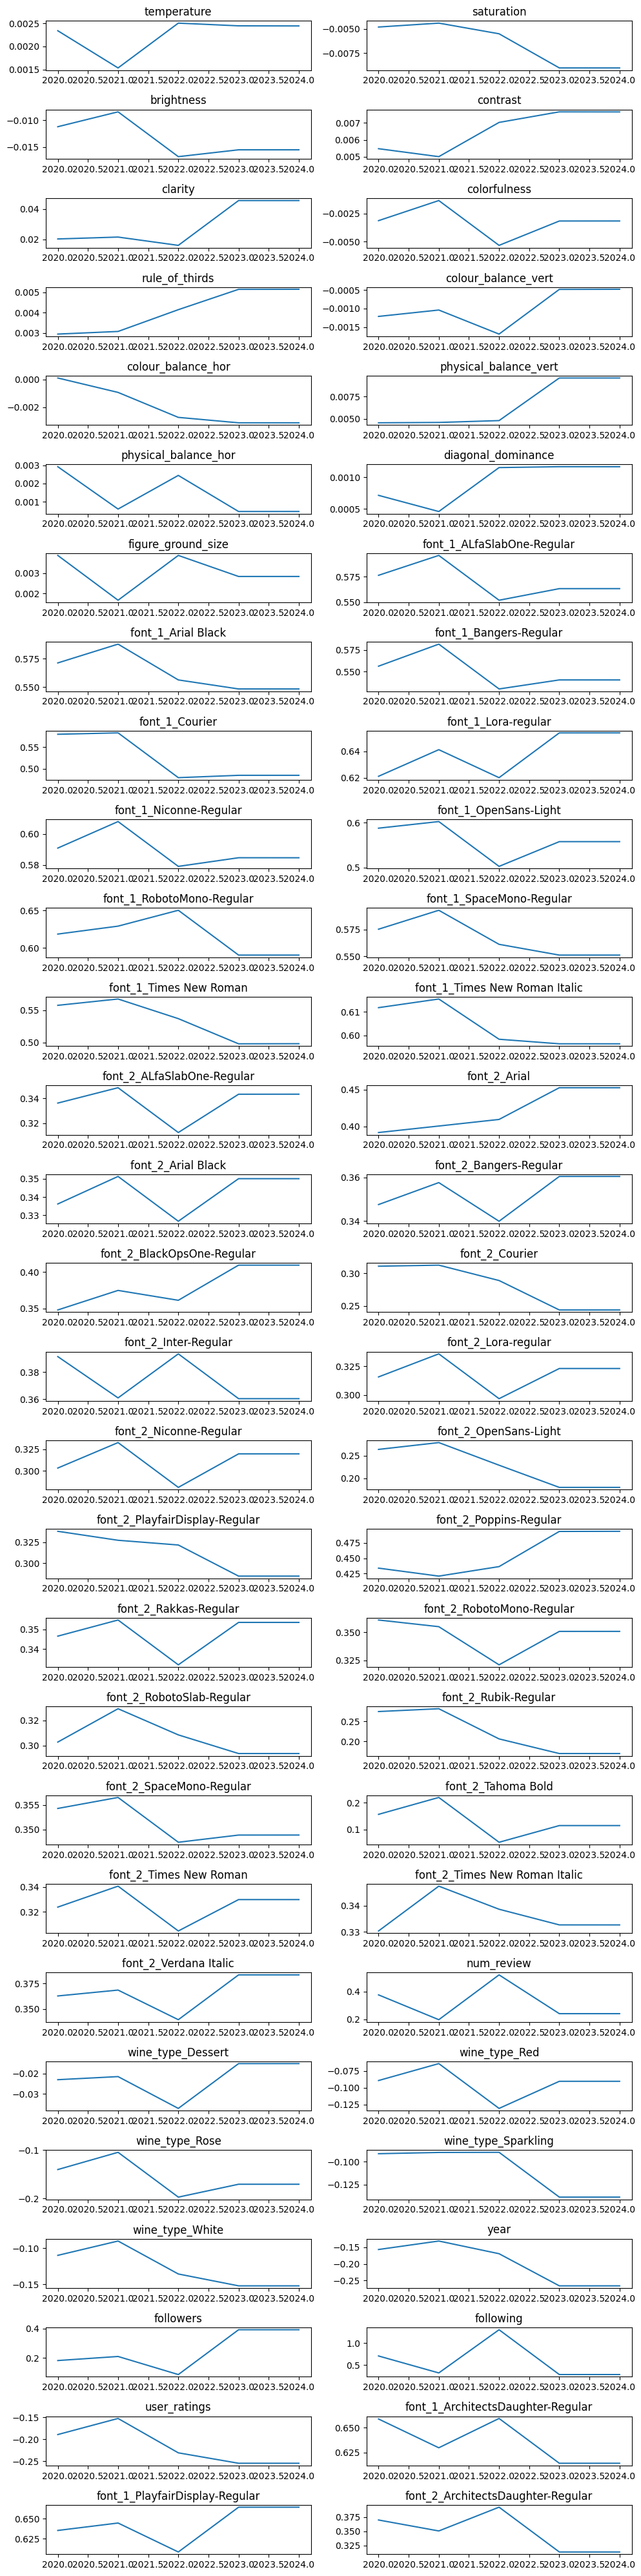

In [ ]:
fig, axs = plt.subplots(29, 2)
for i in range(29):
  for j in range(2):
    axs[i,j].plot(years, vals[2*i + j])
    axs[i,j].set_title(features[2*i + j])
fig.set_figheight(40)
fig.set_figwidth(10)
fig.tight_layout()

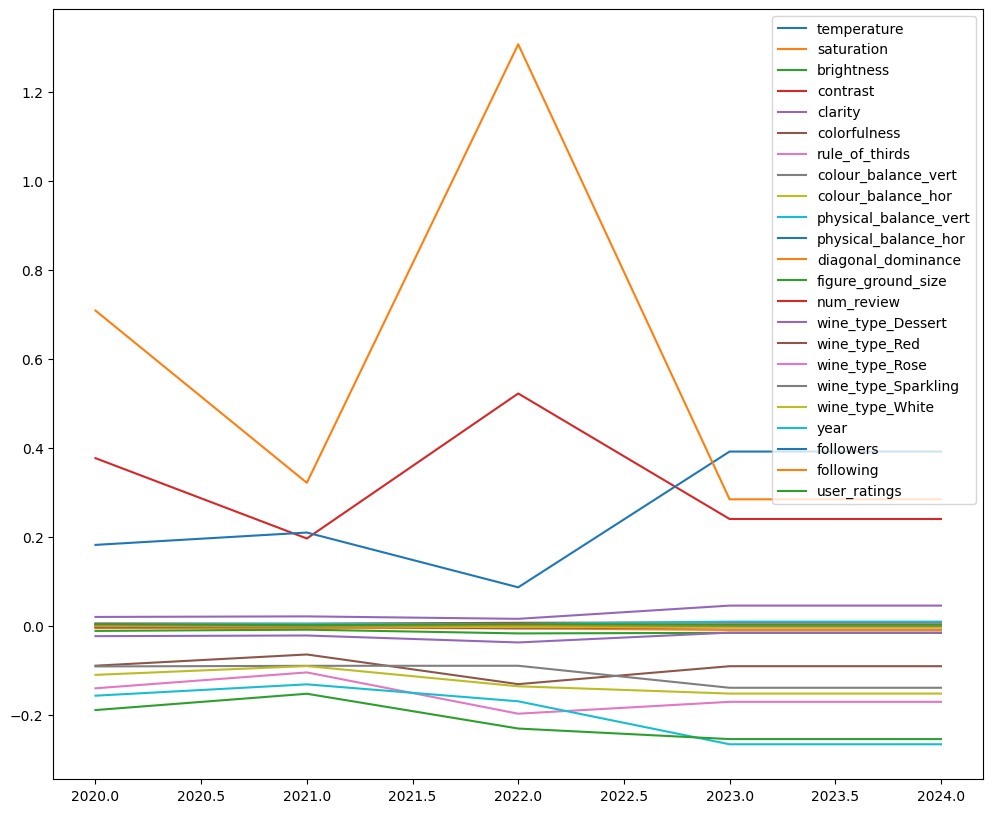

In [ ]:
for i in range(len(feat_no_fonts)):
  plt.plot(years, val_no_fonts[i], label = feat_no_fonts[i])
plt.legend()
plt.rcParams["figure.figsize"] = (12,10)
plt.show()

In [ ]:
no_font_nums = [0,1,2,3,4,5,6,7,8,9,10,11,12,45,46,47,48,49,50,51,52,53,54]

In [ ]:
# feat_no_fonts = features[no_font_nums]
# feat_no_fonts
feat_no_fonts = [features[i] for i in no_font_nums]
val_no_fonts = [vals[i] for i in no_font_nums]
# feat_no_fonts = [features[i] for i in no_font_nums]


In [ ]:
for i in range(45, len(features)):
  feat_no_fonts.append(features[i])
feat_no_fonts = feat_no_fonts[:-4]
feat_no_fonts

['temperature',
 'saturation',
 'brightness',
 'contrast',
 'clarity',
 'colorfulness',
 'rule_of_thirds',
 'colour_balance_vert',
 'colour_balance_hor',
 'physical_balance_vert',
 'physical_balance_hor',
 'diagonal_dominance',
 'figure_ground_size',
 'num_review',
 'wine_type_Dessert',
 'wine_type_Red',
 'wine_type_Rose',
 'wine_type_Sparkling',
 'wine_type_White',
 'year',
 'followers',
 'following',
 'user_ratings']

In [ ]:
len(feat_no_fonts)

23

## Statsmodels

In [13]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
print(model20.summary())
print(model21.summary())
print(model22.summary())
print(model23.summary())
print(model24.summary())


                            OLS Regression Results                            
Dep. Variable:             rating2020   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     41.56
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        14:52:06   Log-Likelihood:                -7106.3
No. Observations:               15238   AIC:                         1.433e+04
Df Residuals:                   15180   BIC:                         1.477e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
temper

In [ ]:
for f in features:
  print(f)

temperature
saturation
brightness
contrast
clarity
colorfulness
rule_of_thirds
colour_balance_vert
colour_balance_hor
physical_balance_vert
physical_balance_hor
diagonal_dominance
figure_ground_size
font_1_ALfaSlabOne-Regular
font_1_Arial Black
font_1_Bangers-Regular
font_1_Courier
font_1_Lora-regular
font_1_Niconne-Regular
font_1_OpenSans-Light
font_1_RobotoMono-Regular
font_1_SpaceMono-Regular
font_1_Times New Roman
font_1_Times New Roman Italic
font_2_ALfaSlabOne-Regular
font_2_Arial
font_2_Arial Black
font_2_Bangers-Regular
font_2_BlackOpsOne-Regular
font_2_Courier
font_2_Inter-Regular
font_2_Lora-regular
font_2_Niconne-Regular
font_2_OpenSans-Light
font_2_PlayfairDisplay-Regular
font_2_Poppins-Regular
font_2_Rakkas-Regular
font_2_RobotoMono-Regular
font_2_RobotoSlab-Regular
font_2_Rubik-Regular
font_2_SpaceMono-Regular
font_2_Tahoma Bold
font_2_Times New Roman
font_2_Times New Roman Italic
font_2_Verdana Italic
num_review
wine_type_Dessert
wine_type_Red
wine_type_Rose
wine_type_Sp

In [ ]:
cf = list(zip(coefs24,features))
cf[0]

(0.005110376929770135, 'temperature')

In [ ]:
cf_featimpsort = sorted(cf,key=lambda x: (-abs(x[0])))
for cf in cf_featimpsort:
  print(cf[0],"\t",cf[1])

3.2380191874427147 	 font_1_PlayfairDisplay-Regular
3.1955617568667067 	 font_1_Lora-regular
3.094990309410457 	 font_1_ArchitectsDaughter-Regular
3.067840714763071 	 font_1_Times New Roman Italic
3.049690368320326 	 font_1_Niconne-Regular
3.043576374781824 	 font_1_RobotoMono-Regular
3.0102205715244215 	 font_1_OpenSans-Light
3.005498215038838 	 font_1_ALfaSlabOne-Regular
2.9724352959762097 	 font_1_SpaceMono-Regular
2.9643761775575634 	 font_1_Arial Black
2.9542621560183635 	 font_1_Bangers-Regular
2.8541221602380418 	 font_1_Times New Roman
2.8357054528474506 	 font_1_Courier
2.075148053322923 	 font_2_Poppins-Regular
1.9846537086821447 	 font_2_Arial
1.899355527932767 	 font_2_BlackOpsOne-Regular
1.8447451186008932 	 font_2_Verdana Italic
1.7902350472466093 	 font_2_Bangers-Regular
1.7780797671686162 	 font_2_Rakkas-Regular
1.7746332767919437 	 font_2_RobotoMono-Regular
1.769746064388871 	 font_2_Inter-Regular
1.7690619092094826 	 font_2_Arial Black
1.7606156429720086 	 font_2_Spac

In [ ]:
corr = X.corrwith(y24)
corr

temperature                          0.028331
saturation                          -0.147344
brightness                          -0.210357
contrast                             0.159636
clarity                             -0.018423
colorfulness                        -0.189980
rule_of_thirds                       0.018083
colour_balance_vert                  0.003460
colour_balance_hor                   0.022449
physical_balance_vert                0.115056
physical_balance_hor                 0.051179
diagonal_dominance                   0.011690
figure_ground_size                   0.020532
font_1_ALfaSlabOne-Regular           0.021230
font_1_Arial Black                  -0.028560
font_1_Bangers-Regular              -0.047017
font_1_Courier                      -0.004823
font_1_Lora-regular                  0.046979
font_1_Niconne-Regular               0.000090
font_1_OpenSans-Light               -0.018054
font_1_RobotoMono-Regular           -0.022042
font_1_SpaceMono-Regular          

In [ ]:
order = corr.map(lambda x : x).abs().sort_values(ascending = False)

In [ ]:
order

year                                 0.305922
wine_type_Red                        0.218789
brightness                           0.210357
wine_type_White                      0.208885
colorfulness                         0.189980
contrast                             0.159636
following                            0.149402
saturation                           0.147344
wine_type_Rose                       0.124713
followers                            0.121745
physical_balance_vert                0.115056
num_review                           0.085190
wine_type_Sparkling                  0.072011
font_2_Lora-regular                  0.063280
wine_type_Dessert                    0.062071
font_2_Bangers-Regular               0.055949
physical_balance_hor                 0.051179
font_2_Times New Roman               0.049801
font_1_Bangers-Regular               0.047017
font_1_Lora-regular                  0.046979
font_2_ALfaSlabOne-Regular           0.042739
font_2_Courier                    

In [ ]:
X[0]

KeyError: 0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error as mse


def loss_calc(data):
  X_train, X_val, y_train, y_val = train_test_split(
    data, y24, test_size=0.33, random_state=0)
  model = Ridge(alpha=1e-2).fit(X_train, y_train)
  y_predict = model.predict(X_val)
  return np.mean(np.absolute(y_predict - y_val))
  # return mse(y_val, y_predict)


all_loss = loss_calc(X)

loss_arr = []
for i in range(len(features)):
  data = []
  for j in range(len(features)):
    if i != j:
      data.append(X[X.columns[j]])
  # Difference in loss determines the importance
  loss_feature = loss_calc(np.transpose(np.array(data)))
  loss_arr.append((features[i], all_loss - loss_feature))
  # print(f"{features[i]:<8}", "\t\t\t", f"{all_loss - loss_feature:.3f}")
loss_sorted = sorted(loss_arr, key=lambda x: (x[1]))
for cf in loss_sorted:
  print('{0: <40}'.format(cf[0]),cf[1])

year                                     -0.009260734807992083
user_ratings                             -0.003018071787051657
followers                                -0.0013358416931454342
clarity                                  -0.0012136163267305877
following                                -0.0011506529356403172
physical_balance_vert                    -0.0007633700110294128
brightness                               -0.000459001726600905
saturation                               -0.000284957949439113
contrast                                 -0.00021606671440213554
num_review                               -0.00018221182971761563
wine_type_Rose                           -0.00015916453275288678
wine_type_White                          -0.0001400630195366459
wine_type_Sparkling                      -0.00010150557514546077
colorfulness                             -6.039949179639792e-05
wine_type_Red                            -5.651278285853656e-05
colour_balance_hor                      

In [ ]:
loss_calc(X,y24)

TypeError: loss_calc() takes 1 positional argument but 2 were given

In [ ]:
from sklearn.metrics import r2_score



In [ ]:
r2_arr = []
for i in range(len(features)):
  data = X[X.columns[i]]
  # Difference in loss determines the importance
  model = sm.OLS(y24, data).fit()
  y_predict = model.predict(data)
  r2_arr.append((features[i], r2_score(y24, y_predict)))
  # print(f"{features[i]:<8}", "\t\t\t", f"{all_loss - loss_feature:.3f}")
r2_sorted = sorted(r2_arr, key=lambda x: (-x[1]))
for cf in r2_sorted:
  print('{0: <40}'.format(cf[0]),cf[1])

year                                     -4.3064220459365306
font_1_ALfaSlabOne-Regular               -8.771362215720778
wine_type_Red                            -19.530869719265052
font_2_Bangers-Regular                   -56.69001473317583
user_ratings                             -91.55577299016852
followers                                -111.85862904588377
following                                -130.0261245758937
clarity                                  -154.94458194901637
font_2_Arial Black                       -164.83970192737624
num_review                               -177.7188896814269
colour_balance_hor                       -184.4958546218785
wine_type_White                          -185.4816217915123
font_2_Rakkas-Regular                    -190.1307796130691
font_2_Times New Roman                   -192.94607417310033
font_2_ALfaSlabOne-Regular               -193.03187335926123
wine_type_Sparkling                      -193.32131948771988
colour_balance_vert             

In [ ]:
from sklearn.linear_model import LinearRegression

r2_arr = []
for i in range(len(features)):
  data = X[X.columns[i]]
  model = LinearRegression()
  data = data.values.reshape(-1,1)
  # data = data.values.reshape(1,-1)
#fit regression model
  model.fit(data, y24)

  # Difference in loss determines the importance
  # model = sm.OLS(y24, data).fit()
  r_squared = model.score(data, y24)
  r2_arr.append((features[i], r_squared))
  # print(f"{features[i]:<8}", "\t\t\t", f"{all_loss - loss_feature:.3f}")
r2_sorted = sorted(r2_arr, key=lambda x: (-x[1]))
for cf in r2_sorted:
  print('{0: <40}'.format(cf[0]),cf[1])



year                                     0.09358800417476487
wine_type_Red                            0.04786878317847065
brightness                               0.04424988121286155
wine_type_White                          0.043632792317377156
colorfulness                             0.036092318636039344
contrast                                 0.02548372976876867
following                                0.02232091561205396
saturation                               0.02171018655767587
wine_type_Rose                           0.015553456656462794
followers                                0.014821826058592835
physical_balance_vert                    0.013237969081362988
num_review                               0.007257307674599867
wine_type_Sparkling                      0.005185548411181351
font_2_Lora-regular                      0.004004373594974853
wine_type_Dessert                        0.0038527553717517815
font_2_Bangers-Regular                   0.003130267319970015
physical_bala

In [ ]:
data = X[X.columns[0]]
model = LinearRegression()
data

0       1.750861
1       1.750861
2      -0.550966
3      -0.550966
4      -0.214025
          ...   
5928    1.805028
5929   -0.703878
5930   -0.688538
5931   -0.878230
5932   -0.492464
Name: temperature, Length: 15238, dtype: float64